#   Лабораторная работа 4. Анализ и визуализация данных. Вариант 3


In [10]:
import csv
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import typing

1. Создание Dataframe с двумя колонками (название класса и абсолютный путь к файлу)

In [11]:
file_name = 'annotation.csv'
Label = []
class_name = []
abs_way = []
with open(file_name) as file:
    reader = csv.reader(file)
    for row in reader:
        if row[2] == 'cats':
            Label.append(0)
        elif row[2] == 'dogs':
            Label.append(1)
        else:
           Label.append('class label')
        class_name.append(row[2])
        abs_way.append(row[0])

dataframe = pd.DataFrame(
    {
        class_name[0]: pd.array(class_name[1:]),
        abs_way[0]: pd.array(abs_way[1:]),
    }
)

2. Именование колонок

In [12]:
dataframe = dataframe.rename(
    columns={class_name[0]: 'class_name',
                abs_way[0]: 'absolute_way'}
)

3. Числовая метка

In [13]:
dataframe['Label'] = pd.array(Label[1:])

4. Информация о высоте, ширине и глубине  изображения

In [14]:
Width = []
Hight = []
Depth = []
Pixels_Count = []
for way in abs_way[1:]:
    try:
        image = cv2.imread(way)
        Width.append(image.shape[1])
        Hight.append(image.shape[0])
        Depth.append(image.shape[2])
        Pixels_Count.append(image.size)
    except BaseException:
        pass 
dataframe['Width'] = pd.array(Width)
dataframe['Hight'] = pd.array(Hight)
dataframe['Depth'] = pd.array(Depth)

In [15]:
print(dataframe)

     class_name                                       absolute_way  Label  \
0          cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
1          cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
2          cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
3          cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
4          cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
...         ...                                                ...    ...   
1995       dogs  /Users/polina/Documents/Programm-lab/dataset/d...      1   
1996       dogs  /Users/polina/Documents/Programm-lab/dataset/d...      1   
1997       dogs  /Users/polina/Documents/Programm-lab/dataset/d...      1   
1998       dogs  /Users/polina/Documents/Programm-lab/dataset/d...      1   
1999       dogs  /Users/polina/Documents/Programm-lab/dataset/d...      1   

      Width  Hight  Depth  
0       448    320      3  
1       480    300 

5. Вычисление статистической информации

In [16]:
print('\nWidth_Statistic\n', dataframe['Width'].describe())
print('\nHight_Statistic\n', dataframe['Hight'].describe())
print('\nDepth_Statistic\n', dataframe['Depth'].describe())
print('\nClass_Label_Statistic\n', dataframe['Label'].describe())


Width_Statistic
 count       2000.0
mean       444.026
std      63.880417
min          180.0
25%          427.0
50%          480.0
75%          480.0
max          480.0
Name: Width, dtype: Float64

Hight_Statistic
 count      2000.0
mean     305.3425
std      26.32846
min         182.0
25%         300.0
50%         320.0
75%         320.0
max         320.0
Name: Hight, dtype: Float64

Depth_Statistic
 count    2000.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Depth, dtype: Float64

Class_Label_Statistic
 count      2000.0
mean          0.5
std      0.500125
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: Label, dtype: Float64


6. Отфильтрованный по метке DataFrame

In [17]:
choise = int(input())
print('\nLabel = ', choise)


Label =  1


In [18]:
def filtering(dataframe, class_type):
    '''
    Фильтрует DataFrame по указанному типу класса и возвращает новый DataFrame

    Parametres
      dataframe
      Исходный датафрейм
      class_type
      тип класса
    Returns
      res_dataframe
      Отфильтрованный DataFrame
    
    '''
    class_name = ''
    if (class_type == 1):
        class_name = 'cats'
    if (class_type == 2):
        class_name = 'dogs'
    res_dataframe = (dataframe[dataframe.class_name == class_name])
    return res_dataframe

In [19]:
print(filtering(dataframe, choise))

    class_name                                       absolute_way  Label  \
0         cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
1         cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
2         cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
3         cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
4         cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
..         ...                                                ...    ...   
995       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
996       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
997       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
998       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
999       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   

     Width  Hight  Depth  
0      448    320      3  
1      480    300      3  
2     

7. Отфильтрованный по заданным параметрам DataFrame

In [20]:
def shape_filtering(dataframe, class_type, max_width, max_hight):
    """
    Функция фильтрует датафрейм по метке класса и размерам картинки

    Args:
        dataframe (_type_): исходный датасет
        class_type (_type_): метка класса
        max_width (_type_): максимальная ширина картинки в отсортированном датафрейме
        max_hight (_type_): максимальная высота картинки в отсортированном датафрейме

    Returns:
        _type_: отсортированый датасет
    """

    class_name = ''
    if (class_type == 1):
        class_name = 'cats'
    if (class_type == 2):
        class_name = 'dogs'
    print('Width = ', max_width)
    print('Hight = ', max_hight)
    res_dataframe = (dataframe[dataframe.class_name == class_name][
                     dataframe.Width <= max_width][dataframe.Hight <= max_hight])
    return res_dataframe

In [21]:
print(shape_filtering(dataframe, choise, 320, 320))

Width =  320
Hight =  320
    class_name                                       absolute_way  Label  \
5         cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
6         cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
14        cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
20        cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
25        cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
..         ...                                                ...    ...   
961       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
968       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
982       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
984       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   
989       cats  /Users/polina/Documents/Programm-lab/dataset/c...      0   

     Width  Hight  Depth  
5      240    320      3  
6      

/var/folders/9r/swdqt2yx3j3gzgng_xt4kng40000gn/T/ipykernel_69670/3948643924.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_dataframe = (dataframe[dataframe.class_name == class_name][
/var/folders/9r/swdqt2yx3j3gzgng_xt4kng40000gn/T/ipykernel_69670/3948643924.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_dataframe = (dataframe[dataframe.class_name == class_name][


8. Группировка DataFramе

In [22]:
dataframe['Pixels_Count'] = pd.array(Pixels_Count)
print('\nMin \n')
print(dataframe.groupby('class_name').Pixels_Count.min())
print('\nMax \n')
print(dataframe.groupby('class_name').Pixels_Count.max())
print('\nMean \n')
print(dataframe.groupby('class_name').Pixels_Count.mean())


Min 

class_name
cats    172800
dogs    172800
Name: Pixels_Count, dtype: Int64

Max 

class_name
cats    460800
dogs    460800
Name: Pixels_Count, dtype: Int64

Mean 

class_name
cats    402917.76
dogs    409472.16
Name: Pixels_Count, dtype: Float64


9-10. Создание гистограммы

In [35]:
def create_histograma(dataframe, class_type):
    """
     Функция создает массивы для дальнейшего создания гистограммы, выводит картинку, с которой работаем и общие графики распределения цветов

     Args:
        dataframe (_type_): исходный датасет
        class_type (_type_): метка класса

     Returns:
         _type_: двумерный массив с информацией о распределении пикселей 3х цветов
     
    """

    result = [[], [], []]

    print('class_type = ', class_type)
    if (class_type == 1):
        image_index = random.randint(0, 1100)
    if (class_type == 2):
        image_index = random.randint(1100, 2200)
    image_way = filtering(dataframe, class_type)['absolute_way'].loc[image_index]
    image = cv2.imread(image_way)
    plt.imshow(image)
    plt.show()
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
        result[i] = histr
    plt.xlabel('Intensity', fontsize=15)
    plt.ylabel('Pixels', fontsize=15)
    plt.title(f'картинка номер {image_index}')
    plt.show()
    return result


class_type =  1


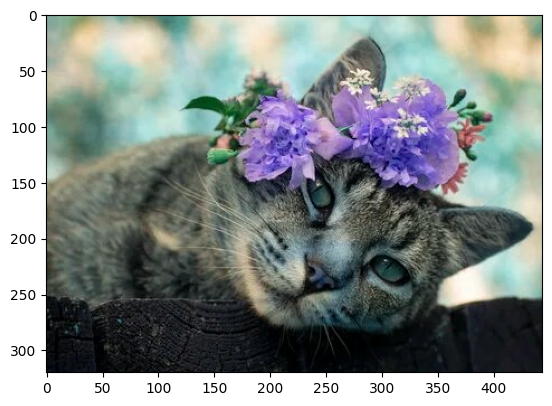

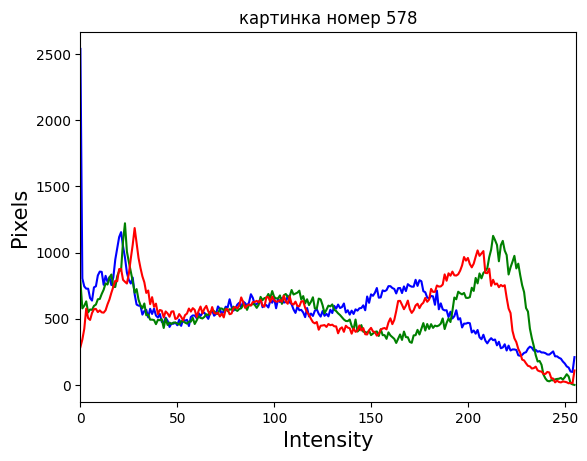

In [34]:
data_for_histograma = create_histograma(dataframe, choise)
about_picture = [(data_for_histograma[0], 'b'),
                 (data_for_histograma[1], 'g'),
                 (data_for_histograma[2], 'r')]